# All material ©2019, Alex Siegman

### An enormous thank you to spaCy, who's existing online courses (https://course.spacy.io/chapter1) were the basis for this Jupyter-ized tutorial. For more information on spaCy's existing online course, check out https://github.com/ines/spacy-course#-faq 

---

## Today we are going to learn about NLP (Natural Language Processing) using spaCy, an open source library for advanced NLP. 

### For more on spaCy, you can check out their site: https://spacy.io/

In [1]:
!pip install spaCy # first things first, make sure you have spaCy installed on your machine 

# if this command doesn't work, go to your terminal and type 'sudo pip install spaCy'
# this will require you to enter your password, but should work if 'pip' alone did not

## Natural Language Processing (NLP) is a subfield of Artificial Intelligence that deals with the 'understanding' of language. 

### For the purposes of this tutorial, we are going to look at the very basics of NLP, including using spaCy, an open-source NLP library. 

In [2]:
from spacy.lang.en import English # import the English language class

nlp = English() # create an nlp object; this object contains the processing pipeline, which you 
                # ultimately use to analyze the text
    
doc = nlp("Hello world!") # "Hello world!" becomes the text that we want to analyze
                          # when you process a text with the nlp object, spaCy creates a Doc object
    
for token in doc: # for every token in our Doc object (a token being a word or character)...
    print(token.text) # simply print out that token 

Hello
world
!


### Similar to how you index through a list in Python, you can index through a Doc to retreive tokens. 

In [3]:
print(doc) # print the full text 
print(doc[1].text) # print the second token (remember, Python is 0-index) in our Doc object

Hello world!
world


### You can also use 'span' which lets you take a slice of the Doc

In [4]:
span = doc[0:2] # this will give us the first and second (again, remember, Python is 0-index)

# also remember, the span is not inclusive, so we don't actually get the third token (second index)
# try "span = doc[0:3]" and you'll see that then you get the '!' included 

print(doc) # print the full text
print(span.text) # print the second and third tokens 

Hello world!
Hello world


## What else can we do with spaCy? 

### Tokens have lots of attributes associated with them! For instance: 

1. is_alpha returns boolean indicating if a token consists of an alphanumeric value
2. is_punct returns boolean indicating if a token is punctuation
3. like_num returns boolean indicating if a token resembles a number 

### These are all called "lexical attributes" – they refer to the entry in the vocabulary and don't depend on the token's context. (More on that later). 

In [5]:
doc = nlp("The earnings report will be released at 5 pm sharp.") # the text we want to work with 

print('Index: ', [token.i for token in doc]) # i is the index of the token in the Doc
print('Text: ', [token.text for token in doc]) # text returns the text of the token

print(" ") # just so we have some nice spacing in our results below...

print('is_alpha:', [token.is_alpha for token in doc]) # if token consists of an alphanumeric value
print('is_punct:', [token.is_punct for token in doc]) # if token is punctuation
print('like_num:', [token.like_num for token in doc]) # if token resembles a number (e.g., '10' or 'TEN')

Index:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Text:  ['The', 'earnings', 'report', 'will', 'be', 'released', 'at', '5', 'pm', 'sharp', '.']
 
is_alpha: [True, True, True, True, True, True, True, False, True, True, False]
is_punct: [False, False, False, False, False, False, False, False, False, False, True]
like_num: [False, False, False, False, False, False, False, True, False, False, False]


### How might that be helpful in real life? 

### Imagine you are charged with reporting on a long press release, and you just want to know where in the document a percent increase or percent decrease is mentioned...

In [6]:
doc = nlp("In 2012, earnings were hovering around 60%, verus in 2019 where they are less than 4% – a 93% decrease.")

for token in doc: # for every token in our Doc object...
    if token.like_num: # if the token resembles a numerical value...
        next_token = doc[token.i + 1] # look at the token following that numerical value...
        if next_token.text == "%": # if that token is a "%" sign...
            next_token = doc[next_token.i + 1] # look at the token following the "%"
            if next_token.text == "increase" or next_token.text == "decrease": # if the token after the % is the word "decrease" or "increase"...
                print("Percentage found:", token.text, next_token.text ) # we know we have found a percentage value

Percentage found: 93 decrease


## spaCy also has a handful of pre-built statistical models, which help when you want to start making predictions about tokens in context. 

In [7]:
!python -m spacy download en # let's install the "english" package, which contains four models 
                             # for more information on the models included, 
                             # check out: https://spacy.io/models/en


✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/Users/siegmanA/miniconda3/lib/python3.7/site-packages/en_core_web_sm -->
/Users/siegmanA/miniconda3/lib/python3.7/site-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [8]:
import spacy 

nlp = spacy.load('en') # loading in the package we just downloaded...

doc = nlp("Adidas AG and Gap Inc. are among those at the end of the long supply chain that travel through \
           China’s northwest region of Xinjiang.") # this is the text we want to analyze 
                                                   # that '\' above just lets me split the text into a new 
                                                   # line in my notebook, and isn't part of the text itself

for token in doc: # for each token in our Doc...
    print(token.text, token.pos_, token.dep_, token.head.text) # print the following:
    
    # .pos_ will give us the parts of speech for each token
    # .dep_ will give us the predicted dependency label 
    # .head.text will give us the 'syntactic head token' (think of it as the parent token this word is attached to)

Adidas PROPN compound AG
AG PROPN nsubj are
and CCONJ cc AG
Gap PROPN compound Inc.
Inc. PROPN conj AG
are VERB ROOT are
among ADP prep are
those DET pobj among
at ADP prep those
the DET det end
end NOUN pobj at
of ADP prep end
the DET det chain
long ADJ amod chain
supply NOUN compound chain
chain NOUN pobj of
that DET nsubj travel
travel VERB relcl chain
through ADP prep travel
            SPACE  through
China PROPN nmod region
’s PROPN nummod China
northwest ADJ amod region
region NOUN ROOT region
of ADP prep region
Xinjiang PROPN pobj of
. PUNCT punct region


### You can also use ent.label_ to decipher entities...

In [9]:
doc = nlp("Adidas AG and Gap Inc. are among those at the end of the long supply chain that travel through \
           China’s northwest region of Xinjiang.")

for ent in doc.ents: # for each entity in our Doc...
    print(ent.text, ent.label_) # print it alongside its label

Adidas AG ORG
Gap Inc. ORG
China GPE
Xinjiang GPE


### To get quick definitions of common tags and labels, you can use ".explain"


In [10]:
print("GPE = " + spacy.explain('GPE'))
print("ORG = " + spacy.explain('ORG'))

GPE = Countries, cities, states
ORG = Companies, agencies, institutions, etc.


## spaCy also lets you write rules to find words and/or phrases in a text. Similar to Regular Expressions, but with some major benefits unique to spaCy. 

### In particular, it allows you to match on Doc objects (not just strings), use the model's prediction capabilities, and match on tokens and token attributes. 

### Match patterns in spaCy are comprised of lists of dictionaries, and each dictionary describes one token. 

### The keys in the dictionary are the names of the token attributes, and are mapped to their expected value.

In [11]:
doc = nlp("New iPhone X release date leaked as Apple reveals pre-orders by mistake.") # our text

from spacy.matcher import Matcher # import the matcher
matcher = Matcher(nlp.vocab) # initialize the matcher

pattern = [{'TEXT':'iPhone'}, {'TEXT':'X'}]    # match these exact token texts

matcher.add('IPHONE_PATTERN', None, pattern) # add the pattern to the matcher

matches = matcher(doc) # call the matcher on our Doc and store the result as a list called 'matches'

print(matches)

[(9528407286733565721, 1, 3)]


### You'll note that the matcher returns a list of tuples. Each tuple consists of three values: 

    1. The match ID
    2. The start index of the matched span
    3. The end index of the matched span
    
### Fortunately, we can iterate over our matches

In [12]:
for match_id, start, end in matches: 
    matched_span = doc[start:end] # start = start index of matched span; end = end index of matched span
    print(matched_span.text)

iPhone X


### Remember, you can also match on lexical attributes and token attributions. 

### For instance, below we are going to look for five tokens: 

1. A token consisting of only digits
2. Two, case-insensitive tokens for the words "revenue" and "up"
3. Another token that consists of only digits
4. A punctuation token

In [13]:
doc = nlp("Earnings are in today! 2019 Revenue up 45%! This is the highest revenue in 5 years.")

pattern = [
    {'IS_DIGIT': True}, # looking for a token consisting of only digits
    {'LOWER': 'revenue'}, # looking for the word "revenue"
    {'LOWER': 'up'}, # looking for the word "up"
    {'IS_DIGIT': True}, # looking for a token consisting of only digits
    {'IS_PUNCT': True} # looking for a punctuation token 
]

matcher.add('REVENUE_PATTERN', None, pattern) # add the pattern to the matcher

matches = matcher(doc)

for match_id, start, end in matches: 
    matched_span = doc[start:end] # start = start index of matched span; end = end index of matched span
    print(matched_span.text)

2019 Revenue up 45%


## A note on Operators and Quantifiers.

### Operators and Quantifiers let you define how often a token should be matched. 

### An Operator can have one of four values: 

1. An "!" negates the token, so it's matched 0 times
2. A "?" makes the token optional, so it matches 0 or 1 times
3. A "+" matches a token 1 or more times
4. A "*" matches a token 0 or more times

### Below, the "?" Operator makes the determiner token optional, so it will match a token with the lemma "raise", followed by an optonal article and a noun:

In [14]:
doc = nlp("Earnings are in today! 2019 Revenue up 45% for Company X. This is the highest revenue in 5 years.")

# note that our text above has changed... 

pattern = [
    {'IS_DIGIT': True}, # looking for a token consisting of only digits
    {'LOWER': 'revenue'}, # looking for the word "revenue"
    {'LOWER': 'up'}, # looking for the word "up"
    {'IS_DIGIT': True}, # looking for a token consisting of only digits
    {'IS_PUNCT': True, 'OP' : '?'} # looking for an OPTIONAL punctuation token
]

matcher.add('REVENUE_PATTERN', None, pattern) # add the pattern to the matcher

matches = matcher(doc)

print("Matches:", [doc[start:end].text for match_id, start, end in matches])

Matches: ['2019 Revenue up 45%']


## Now let's delve into Vocabularies

### spaCy stores all shared data in a vocabulary, which includes words, as well as the labeled schemas for tags and entities. 

### spaCy uses a hash function to generate an ID for each string, which is stored in a string store and is available via nlp.vocab.strings

### This string store is ultimately a lookup table whereby you can look up a string to get its hash, or, look up a hash to get the string. 

### For instance...

In [15]:
doc = nlp("I love coffee") # our text

print('hash value:', nlp.vocab.strings['coffee']) # print the hash value given the text
print('string value:', nlp.vocab.strings[3197928453018144401]) # print the text value given the hash 

hash value: 3197928453018144401
string value: coffee


### Don't forget, lexemes are context-independent entries that hold  info about a word, like whether it consists of alphaneumeric characters. They do not have part-of speech tags, depdnencies or entity labels. Those depend on the context.

In [16]:
doc = nlp("I love coffee") # our text
lexeme = nlp.vocab['coffee'] # check the lexical attributes of our word, 'coffee'

print(lexeme.text, lexeme.orth, lexeme.is_alpha) 

coffee 3197928453018144401 True


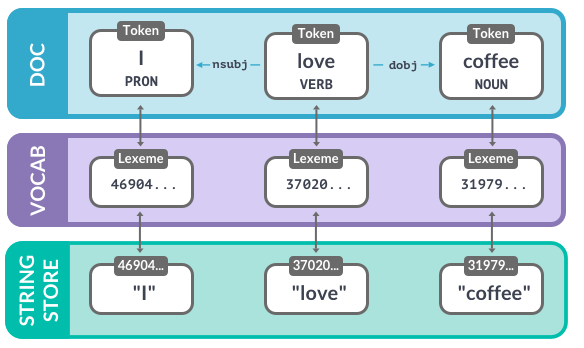

#### Image via spaCy (https://course.spacy.io/chapter2)

## Now, some work with Doc Objects

### The Doc object is created automatically when you process a text with the nlp object. But you can also instantiate the class manually after creating the nlp object, we can import the Doc class from spacy.tokens

### Below we're creating a Doc from three words. The spaces are a list of boolean values indicating whether the word is followed by a space. The Doc class takes three arguments: the shared vocab, the words, and the spaces

In [17]:
from spacy.tokens import Doc


words = ['Hello', 'world', '!'] # the words and spaces to create the doc from
spaces = [True, False, False]

doc = Doc(nlp.vocab, words=words, spaces=spaces) # create a doc manually

### A span is a slice of a Doc consisting of one or more tokens. The span takes at least three arguments: the doc it refers to, and the start and end index of the span. (Remember that the end index is exclusive!) 

### To add an entity label to the span, we first need to look up the string in the string store. We can then provide it to the span as the label argument

In [18]:
from spacy.tokens import Doc, Span

words = ["spaCy", "is", "cool", "!"] # desired text: "spaCy is cool!"
spaces = [True, True, False, False]

doc = Doc(nlp.vocab, words=words, spaces=spaces) # create a Doc from the words and spaces

print(doc.text)

spaCy is cool!


### Let's try another example:

In [19]:
from spacy.tokens import Doc, Span

words = ["I", "like", "Barcelona", "it's", "great!"]
spaces = [True, True, True, True, False]

doc = Doc(nlp.vocab, words=words, spaces=spaces) # create a doc from the words and spaces
print(doc.text)

span = Span(doc, 2, 3, label="PLACE") # create a span for "Barcelona" from the doc and assign it the label "PLACE"
print(span.text, span.label_)

doc.ents = [span] # add the span to the doc's entities
print([(ent.text, ent.label_) for ent in doc.ents]) # print entities' text and labels

I like Barcelona it's great!
Barcelona PLACE
[('Barcelona', 'PLACE')]


## Moving on...

### spaCy also lets you compare two objects to predict how similar they are. 

### These objects can be documents, spans, or single tokens. 

In [20]:
# !sudo python -m spacy download en_core_web_md

import en_core_web_md # you only have to download it in the line above if you didn't earlier

nlp = en_core_web_md.load()

# compare two documents

doc1 = nlp("I like fast food") # doc 1 to be compared
doc2 = nlp("I like pizza") # doc 2 to be compared

print(doc1.similarity(doc2))

0.8627204117787385


### We can also compare two tokens: 

In [21]:
nlp = en_core_web_md.load()

doc = nlp("I like pizza and pasta")

# compare two tokens

token1 = doc[2] # the word "pizza"
token2 = doc[4] # the word "pasta"

print(token1.similarity(token2)) 

0.73695457


In [22]:
doc = nlp("TV and books")

token1, token2 = doc[0], doc[2]

similarity = token1.similarity(token2) # get the similarity of the tokens "TV" and "books"

print(similarity)

0.2232533


### Or, a document with a token: 

In [23]:
nlp = en_core_web_md.load()

# compare a document with a token

doc = nlp("I like being clean") # this full text
token = nlp("I also like soap")[3] # the word "soap"

print(doc.similarity(token))

0.37694994966106565


### And, last but not least, a span with a document: 

In [24]:
nlp = en_core_web_md.load()

# compare a span with a document

span = nlp("I like pizza and pasta")[2:5] # the words "pizza and pasta"
doc = nlp("McDonalds sells burgers") # this full text

print(span.similarity(doc))

0.6199092090831612


### In spaCy, similarity is determined using word vectors, multi-dimensional representations of meanings of words. You might have heard of Word2Vec, which is an algorithm that's often used to train word vectors from raw text.

### By default, the similarity returned by spaCy is the cosine similarity between two vectors – but this can be adjusted if necessary. Vectors for objects consisting of several tokens, like the Doc and Span, default to the average of their token vectors.

### That's also why you usually get more value out of shorter phrases with fewer irrelevant words.

### Let's take a look at what these vector's look like, and what that all actually means: 

In [25]:
doc = nlp("I have a banana") # process a text

print(doc[3].vector) # look up the vector for the word "banana" using the token.vector attribute
                     # the result is a 300-dimensional vector.

[ 2.0228e-01 -7.6618e-02  3.7032e-01  3.2845e-02 -4.1957e-01  7.2069e-02
 -3.7476e-01  5.7460e-02 -1.2401e-02  5.2949e-01 -5.2380e-01 -1.9771e-01
 -3.4147e-01  5.3317e-01 -2.5331e-02  1.7380e-01  1.6772e-01  8.3984e-01
  5.5107e-02  1.0547e-01  3.7872e-01  2.4275e-01  1.4745e-02  5.5951e-01
  1.2521e-01 -6.7596e-01  3.5842e-01 -4.0028e-02  9.5949e-02 -5.0690e-01
 -8.5318e-02  1.7980e-01  3.3867e-01  1.3230e-01  3.1021e-01  2.1878e-01
  1.6853e-01  1.9874e-01 -5.7385e-01 -1.0649e-01  2.6669e-01  1.2838e-01
 -1.2803e-01 -1.3284e-01  1.2657e-01  8.6723e-01  9.6721e-02  4.8306e-01
  2.1271e-01 -5.4990e-02 -8.2425e-02  2.2408e-01  2.3975e-01 -6.2260e-02
  6.2194e-01 -5.9900e-01  4.3201e-01  2.8143e-01  3.3842e-02 -4.8815e-01
 -2.1359e-01  2.7401e-01  2.4095e-01  4.5950e-01 -1.8605e-01 -1.0497e+00
 -9.7305e-02 -1.8908e-01 -7.0929e-01  4.0195e-01 -1.8768e-01  5.1687e-01
  1.2520e-01  8.4150e-01  1.2097e-01  8.8239e-02 -2.9196e-02  1.2151e-03
  5.6825e-02 -2.7421e-01  2.5564e-01  6.9793e-02 -2

#### For more on word vectors check out this blog post by Jayesh Bapu Ahire: 

https://medium.com/@jayeshbahire/introduction-to-word-vectors-ea1d4e4b84bf

### Predicting similarity can be useful for many types of applications. For example, to recommend a user similar texts based on the ones they have read. It can also be helpful to flag duplicate content, like posts on an online platform.

### However, it's important to keep in mind that there's no objective definition of what's similar and what isn't. It always depends on the context and what your application needs to do.

### For example, spaCy's default word vectors assign a very high similarity score to "I like cats" and "I hate cats". This makes sense, because both texts express sentiment about cats. But in a different application context, you might want to consider the phrases as very dissimilar, because they talk about opposite sentiments.

In [26]:
doc1 = nlp("I like cats")
doc2 = nlp("I hate cats")

print(doc1.similarity(doc2))

0.9501446702124066


## spaCy's Statistical Models

### Statistical models are good if you need to generalize based on a few examples (like detecting a product or person). 

### You can use spaCy's entity recognizer, depndency parser, or part of speech tagger to do this.

### Rule based sysetms are good if there's a more or less finite number of instance you want to find. For instance, all countries or cities in the world, drug names, or dog breeds. 

### In spaCy, you can achieve this with custom tokenization rules, as well as the matcher and phrase matcher.

### Recall our earlier work with the rule-based matcher: 

In [27]:
matcher = Matcher(nlp.vocab)

matcher.add('DOG', None, [{'LOWER': 'golden'}, {'LOWER': 'retriever'}])

doc = nlp("I have a Golden Retriever")

for match_id, start, end in matcher(doc): # iterate over the matches returned by the matcher
    span = doc[start:end] 
    print('Matched span:', span.text) 
    print('Root token:', span.root.text) # get the span's root token and root head token
    print('Root head token:', span.root.head.text) # get the previous token and its POS tag
    print('Previous token:', doc[start - 1].text, doc[start - 1].pos_)

Matched span: Golden Retriever
Root token: Retriever
Root head token: have
Previous token: a DET


### The phrase matcher is another tool to find phrases. It performs a keyword search on the document, but instead of only finding strings, it gives you direct access to the tokens in context, and takes Doc objects as patterns. 


In [28]:
from spacy.matcher import PhraseMatcher

matcher = PhraseMatcher(nlp.vocab)

pattern = nlp("Golden Retriever")
matcher.add('DOG', None, pattern)
doc = nlp("I have a Golden Retriever")

for match_id, start, end in matcher(doc): # iterate over the matches
    
    span = doc[start:end] # get the matched span
    print('Matched span:', span.text)

Matched span: Golden Retriever


### For more on matches, check out the Match Explorer! https://explosion.ai/demos/matcher

In [29]:
doc = nlp("Tesla Inc.’s driver-assistance feature was active and the driver’s hands weren’t detected on the wheel \
           during a fatal crash in March, U.S. safety investigators said Thursday, a finding that could amp up \
           scrutiny of the car maker’s Autopilot system as the company pushes for more automation in its vehicles."
)

# create the match patterns

pattern1 = [{"LOWER": "tesla"}, {"IS_TITLE": True, "POS": "PROPN"}]
pattern2 = [{"LOWER": "fatal"}]

matcher = Matcher(nlp.vocab) # initialize the Matcher and add the patterns

matcher.add("Tesla_Pattern > ", None, pattern1)
matcher.add("Fatal_Pattern > ", None, pattern2)

for match_id, start, end in matcher(doc): # iterate over the matches
    print(doc.vocab.strings[match_id], doc[start:end].text) # print pattern string name and text of matched span


Tesla_Pattern >  Tesla Inc.
Fatal_Pattern >  fatal


## Understanding Processing Pipelines

### Processing pipelines are a series of functions applied to a Doc to add attribtues like part-of-speech tags, dependency labels, or named entities.

### What happpens when you call "doc = nlp()"? 

1. The tokenizer is applied to turn the string of text into a Doc object
2. A series of pipeline components is applied to the Doc in order 
3. Finally, the processed Doc is returned so that you can work with it

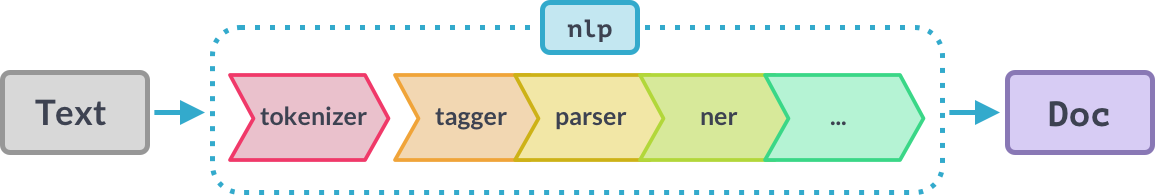

#### Image via https://course.spacy.io/chapter3

## spaCy ships with the following built-in pipeline components:

1. The part-of-speech tagger sets the token dot tag attribute.

2. The depdendency parser adds the token dot dep and token dot head attributes and is also responsible for detecting sentences and base noun phrases, also known as noun chunks.

3. The named entity recognizer adds the detected entities to the doc dot ents property. It also sets entity type attributes on the tokens that indicate if a token is part of an entity or not.

4. Finally, the text classifier sets category labels that apply to the whole text, and adds them to the doc dot cats property.

### Custom pipeline components let you add your own functions to the spaCy pipeline that is executed when you call the nlp object on a text.

In [30]:
# e.g. 1: a custom component that prints the character length of a document

def length_component(doc): # define the custom component
    doc_length = len(doc) # get the doc's length
    print("This document is {} tokens long.".format(doc_length))
    return doc

nlp = spacy.load("en_core_web_sm") # load the small English model

nlp.add_pipe(length_component, first=True) # add the component first in the pipeline and print the pipe names

print(nlp.pipe_names)

doc = nlp("This is a sentence.") # process a text

['length_component', 'tagger', 'parser', 'ner']
This document is 5 tokens long.


In [31]:
# e.g. 2: a custom component that uses the PhraseMatcher to find animal names in the document & adds matched spans 
# to the doc.ents. 

import spacy
from spacy.matcher import PhraseMatcher
from spacy.tokens import Span

nlp = spacy.load("en_core_web_sm")
animals = ["Golden Retriever", "cat", "turtle", "Rattus norvegicus"]
animal_patterns = list(nlp.pipe(animals))
print("animal_patterns:", animal_patterns)
matcher = PhraseMatcher(nlp.vocab)
matcher.add("ANIMAL", None, *animal_patterns)

def animal_component(doc): # define the custom component

    matches = matcher(doc) # apply the matcher to the doc
    spans = [Span(doc, start, end, label="ANIMAL") for match_id, start, end in matches] # create a Span for each match and assign the label 'ANIMAL'
    doc.ents = spans # overwrite the doc.ents with the matched spans

    return doc

nlp.add_pipe(animal_component, after="ner") # add the component to the pipeline after the 'ner' component

print(nlp.pipe_names)

doc = nlp("I have a cat and a Golden Retriever") # process the text and print the text and label for the doc.ents

print([(ent.text, ent.label_) for ent in doc.ents])

animal_patterns: [Golden Retriever, cat, turtle, Rattus norvegicus]
['tagger', 'parser', 'ner', 'animal_component']
[('cat', 'ANIMAL'), ('Golden Retriever', 'ANIMAL')]


### Custom attributes let you add any metadata to Docs, Tokens, and Spans. 

### These attributes need to be registe3red on the global Doc, Token, and Span classes before you can import from spaCy.tokens. To register a custom attribute on the Doc, Token, or Span, you can use the set extension method. 

### The first argument is the attribute name. Keyword arguments let you define how the value should be computed: 

In [32]:
from spacy.tokens import Doc, Token, Span

doc = nlp("The sky is blue.") # our text

Token.set_extension('is_color', default=False, force=True) # you must first 'set the extension'
 
doc[3]._.is_color = True # we assign 'blue' with the extension 'is_color'

## BeautifulSoup + spaCy

### Now, let's use some of the BeautifulSoup to analyze some text from an online source:

<!DOCTYPE html>
<!-- TESLA DESKTOP16 V1 RESPONSIVE_ARTICLE SNIPPET --><html data-env="prod" data-layouttype="article" data-protocol="https" data-region="na,us" data-site="wsj" itemscope="" itemtype="http://schema.org/WebPage" lang="en-US" xmlns="http://www.w3.org/1999/xhtml">
<head>
<title>Singapore’s GIC Bets on Wastewater Company, Takes Stake at $2.8 Billion Valuation  - WSJ</title>
<meta content="width=device-width, initial-scale=1.0, minimum-scale=1.0, maximum-scale=1.0, user-scalable=no" name="viewport"/>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="i-0ff9" name="dj.asn"/>
<meta content="nonsubscriber" name="user.type"/>
<meta content="default" name="user.exp"/>
<meta content="Article" name="page.section"/>
<meta content="Article" name="page.content.type"/>
<meta content="responsive" name="page.content.format"/>
<meta content="WSJ Online" name="page.content.source"/>
<meta content="snippe
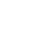
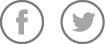

In [33]:
import time
import re
import csv
import requests
from bs4 import BeautifulSoup

r = requests.get('https://www.wsj.com/articles/singapores-gic-bets-on-wastewater-company-takes-stake-at-3-billion-valuation-11558085401') 
    # for more on the requests library check out this tutorial from RealPython: 
    # https://realpython.com/python-requests/
            
soup = BeautifulSoup(r.text,'html') # we are going to turn that URL into 'soup', aka, we are going to be 
                                    # able to see it's metadata For more on BeautifulSoup, check out: 
                                    # https://www.crummy.com/software/BeautifulSoup/bs4/doc/
            
print(soup)

### Now, we know that what we're interested in is the text of this article. So, let's see what that looks like in the HTML.

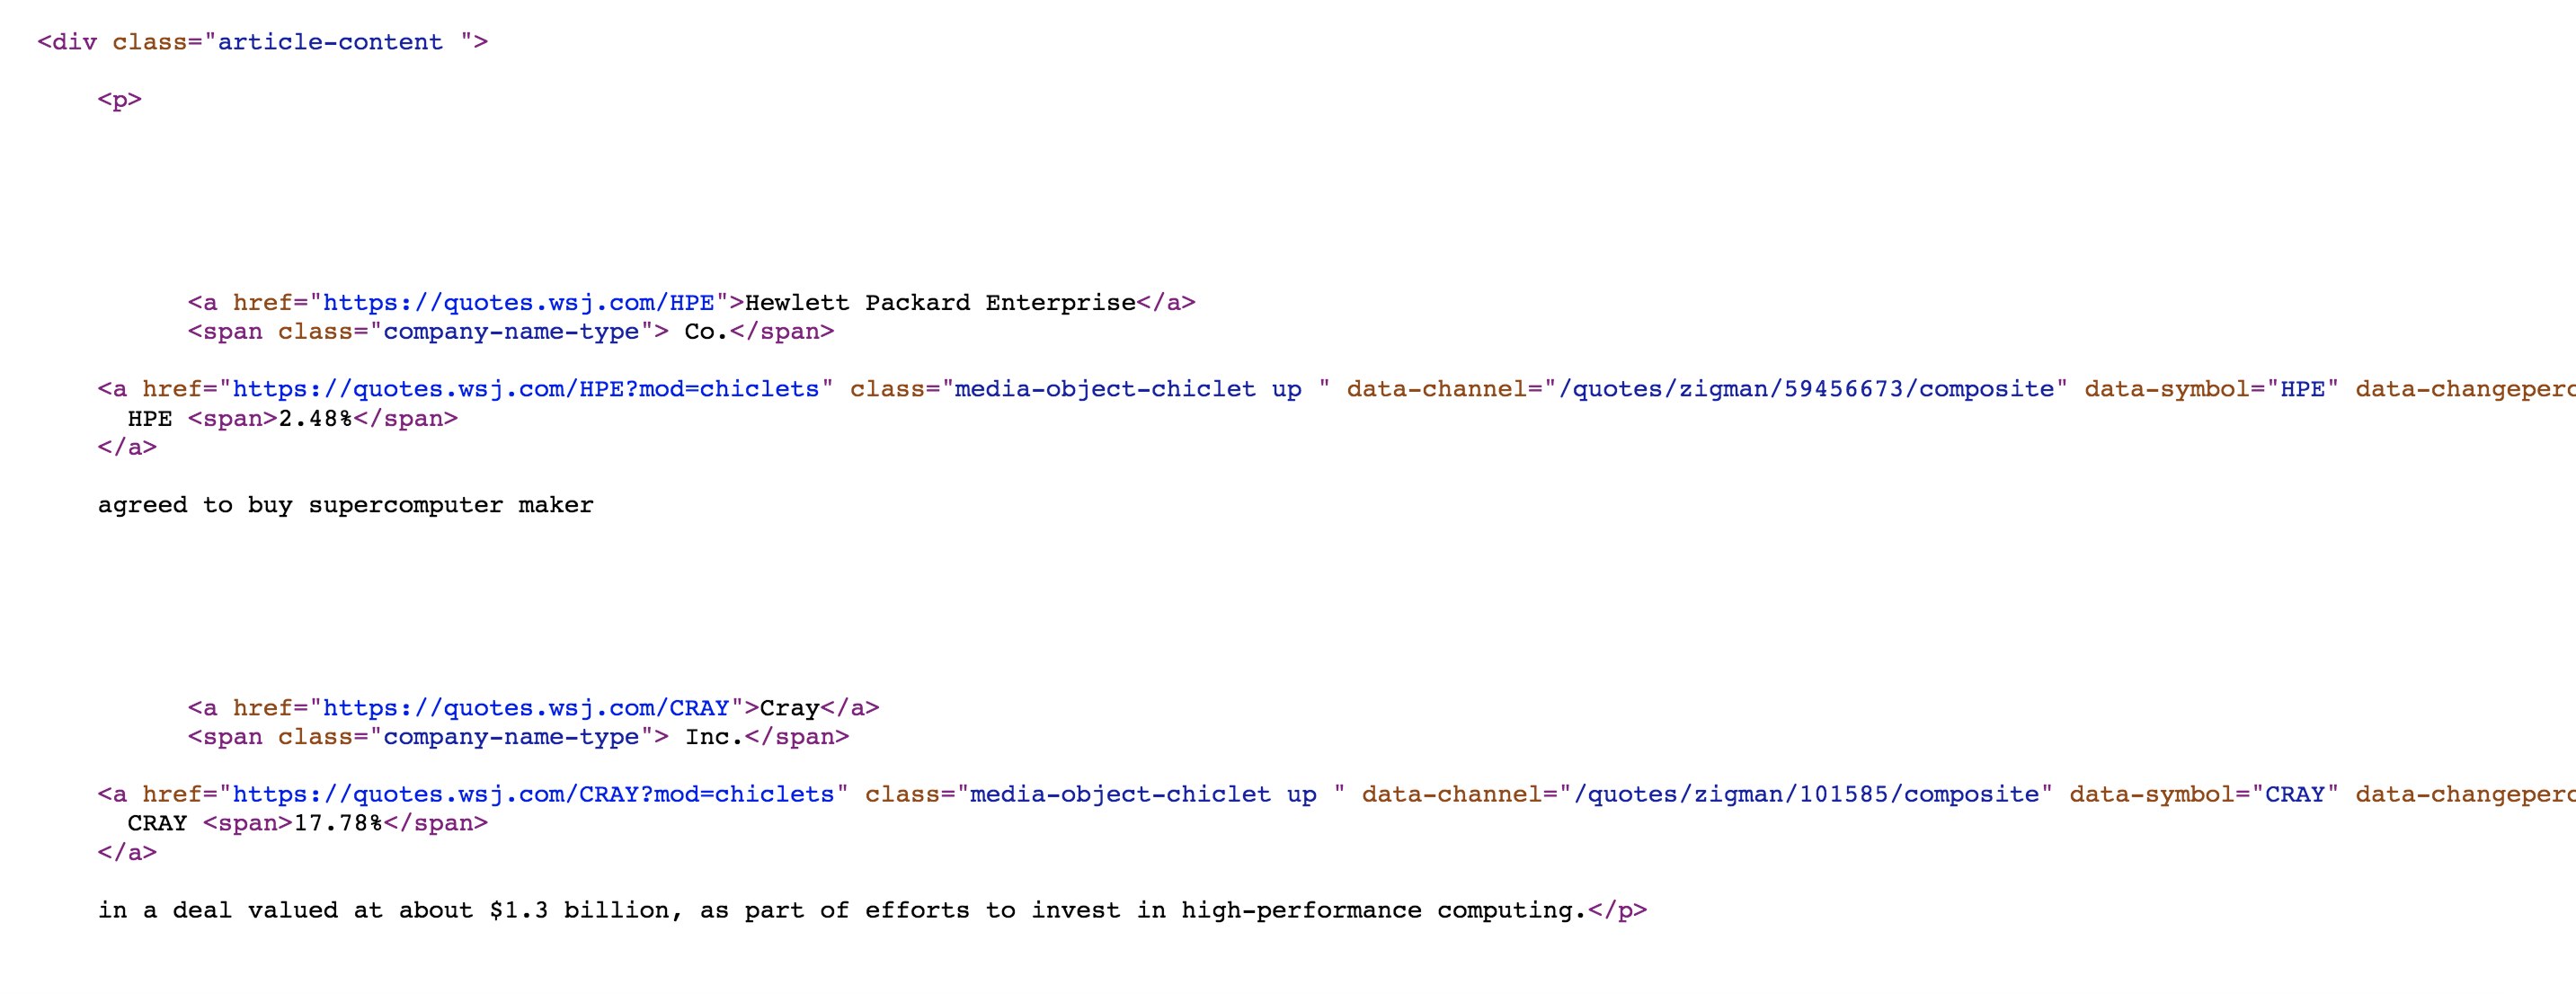

In [34]:
paragraphs = [i.get_text() for i in soup.find_all('p')] # find all of the <p> elements in our text

print(paragraphs) 

['May 29, 2019', 'Singapore sovereign-wealth fund GIC has bought a stake in WaterBridge Resources LLC in a deal that values the Houston-based handler of oil-drilling wastewater at $2.8 billion including debt.', 'GIC bought a 20% interest in WaterBridge, according to a person familiar with the deal’s terms. Five Point Energy, a Texas investment firm that started WaterBridge in 2016 with $200 million of seed money, said in a statement that it and some of the company’s executives sold GIC the stake. ', 'WSJ Membership', 'Customer Service', 'Tools & Features', 'Ads', 'More']


In [35]:
article = '\n'.join(paragraphs) # join all of those paragraphs together

print(article)

May 29, 2019
Singapore sovereign-wealth fund GIC has bought a stake in WaterBridge Resources LLC in a deal that values the Houston-based handler of oil-drilling wastewater at $2.8 billion including debt.
GIC bought a 20% interest in WaterBridge, according to a person familiar with the deal’s terms. Five Point Energy, a Texas investment firm that started WaterBridge in 2016 with $200 million of seed money, said in a statement that it and some of the company’s executives sold GIC the stake. 
WSJ Membership
Customer Service
Tools & Features
Ads
More


### You'll note that we only get the first 500 characters of the article because, well, we're paywalled! Nevertheless, let's see what we can do...

### What if we want to know what entities are mentioned in the article? 

In [36]:
nlp = spacy.load('en')

doc = nlp(article) # our text is going to be the article text above (that first 500 characters)

for ent in doc.ents: # for each entity in our Doc...
    print(ent.text, ent.label_) # print that entity aside its label

May 29, 2019 DATE
Singapore GPE
GIC ORG
WaterBridge Resources LLC ORG
Houston GPE
$2.8 billion MONEY
GIC ORG
20% PERCENT
WaterBridge ORG
Five Point Energy ORG
Texas GPE
WaterBridge ORG
2016 DATE
$200 million MONEY
’s ORG
Customer Service
Tools & Features ORG


### What if we want to know if the article mentions anything about a stock purchase or sale...

In [37]:
pattern1 = [{"POS":"PROPN"}, {"IS_TITLE": True, "POS": "PROPN"}]
pattern2 = [{"LOWER": "bought"}]
pattern3 = [{"LOWER": "sold"}]

matcher = Matcher(nlp.vocab) # initialize the Matcher and add the patterns

matcher.add("ID_PATTERN", None, pattern1)
matcher.add("BUY_PATTERN", None, pattern2)
matcher.add("SELL_PATTERN", None, pattern3)

for match_id, start, end in matcher(doc): # iterate over the matches
    print(doc.vocab.strings[match_id], doc[start:end].text) # print pattern string name and text of matched span

BUY_PATTERN bought
ID_PATTERN WaterBridge Resources
BUY_PATTERN bought
ID_PATTERN Point Energy
SELL_PATTERN sold
ID_PATTERN WSJ Membership
ID_PATTERN Customer Service


### Below is a more complex query from the spaCy online tutorial: 

In [38]:
from __future__ import unicode_literals, print_function

import plac
import spacy
import argparse

In [39]:
def main(model="en_core_web_sm"):
    nlp = spacy.load(model)
    print("Loaded model '%s'" % model)
    print("Processing %d texts" % len(TEXTS))

    for text in TEXTS:
        doc = nlp(text)
        relations = extract_currency_relations(doc)
        for r1, r2 in relations:
            print("{:<10}\t{}\t{}".format(r1.text, r2.ent_type_, r2.text))

def filter_spans(spans):
    # Filter a sequence of spans so they don't contain overlaps
    get_sort_key = lambda span: (span.end - span.start, span.start)
    sorted_spans = sorted(spans, key=get_sort_key, reverse=True)
    result = []
    seen_tokens = set()
    for span in sorted_spans:
        if span.start not in seen_tokens and span.end - 1 not in seen_tokens:
            result.append(span)
            seen_tokens.update(range(span.start, span.end))
    return result

def extract_currency_relations(doc):
    # Merge entities and noun chunks into one token
    seen_tokens = set()
    spans = list(doc.ents) + list(doc.noun_chunks)
    spans = filter_spans(spans)
    with doc.retokenize() as retokenizer:
        for span in spans:
            retokenizer.merge(span)

    relations = []
    for money in filter(lambda w: w.ent_type_ == "MONEY", doc):
        if money.dep_ in ("attr", "dobj"):
            subject = [w for w in money.head.lefts if w.dep_ == "nsubj"]
            if subject:
                subject = subject[0]
                relations.append((subject, money))
        elif money.dep_ == "pobj" and money.head.dep_ == "prep":
            relations.append((money.head.head, money))
    return relations



if __name__ == "__main__":
    print(extract_currency_relations(doc))

[(values, $2.8 billion), (started, $200 million)]


## What if we use a much, much bigger text? Say, the Mueller Report? 

In [40]:
import spacy

report = open("/Users/siegmanA/Desktop/Python101/Working with Open-Source Libraries/Introduction to Advanced NLP using spaCy/mueller_report.csv").read()

# csv via https://www.kaggle.com/paultimothymooney/mueller-report

report_part1 = report[0:100000] # we need to take the first 100k characters because that is the spaCy limit

nlp = spacy.load('en')

doc = nlp(report_part1)

### Let's see all the organizations named in the first 100k characters of the Mueller report...


In [41]:
for ent in doc.ents:
    if ent.label_ == 'ORG':
        print(ent.text, ent.label_)

1,1,U.S. Department of Justice
 ORG
Fed ORG
Department of Justice ORG
Department of Justice ORG
Predttet / ORG
CeHtail'lMaterial Preteeted UHder Fed ORG
3,5,"EXECUTIVE SUMMARY ORG
RUSSIAN ORG
U.S. Operations Involving Political Rallies ORG
U.S. Persons ORG
Contacts ORG
Trump ORG
Trump Campaign Officials ORG
RUSSIAN HACKING AND ORG
GRU ORG
DCCC ORG
DNC Networks ORG
DNC Networks ORG
Documents ORG
DNC ORG
WikiLeaks ORG
WikiLeaks ORG
WikiLeaks ORG
DCLeaks ORG
4,1,U.S. Department of Justice ORG
Cel'ltail'IMaterial Preteeteti UH ORG
GRU ORG
WikiLeaks ORG
Intrusions Targeting the Administration of U .S. ORG
the Dissemination of Hacked Materials ORG
WikiLeaks ORG
Ongoing Matter ORG
WikiLeaks ORG
WikiLeaks ORG
Potential Campaign Interest ORG
Russian Hacked Materials ORG
RUSSIAN GOVERNMENT LINKS ORG
TRUMP ORG
Trump Tower Moscow Project ORG
Trump Tower Moscow Venture ORG
the Crocus Group ORG
LC ORG
Expert Investment Company ORG
the Letter of Intent ORG
the Trump Organization ORG
Candidate ORG
Tru

### How about any mentions of "WikiLeaks" or "Trump Tower Meeting"?

In [42]:
from spacy.matcher import Matcher # import the matcher

matcher = Matcher(nlp.vocab)

matcher.add('WIKILEAKS', None, [{'LOWER': 'wikileaks'}])

doc = nlp(report_part1)

for match_id, start, end in matcher(doc): # iterate over the matches returned by the matcher
    span = doc[start:end] 
    print('Matched span:', span.text) 
    print('Root token:', span.root.text) # get the span's root token and root head token
    print('Root head token:', span.root.head.text) # get the previous token and its POS tag
    print('Previous 3 tokens:', doc[start - 1].text, doc[start - 2].text, doc[start - 3].text)
    print('Following 3 tokens:', doc[start + 1].text, doc[start + 2].text, doc[start + 3].text)
    print("\n")

Matched span: WikiLeaks
Root token: WikiLeaks
Root head token: of
Previous 3 tokens: of Use .
Following 3 tokens: ......... ........... .....


Matched span: WikiLeaks
Root token: WikiLeaks
Root head token: Opposition
Previous 3 tokens: . 3,33,a 

Following 3 tokens: 's Expressed Opposition


Matched span: WikiLeaks
Root token: WikiLeaks
Root head token: Contact
Previous 3 tokens: . 3,34,b 

Following 3 tokens: 's First Contact


Matched span: WikiLeaks
Root token: WikiLeaks
Root head token: to
Previous 3 tokens: to Materials Stolen
Following 3 tokens: ........... ....................... 45


Matched span: WikiLeaks
Root token: WikiLeaks
Root head token: Statements
Previous 3 tokens: · . 4,4,d
Following 3 tokens: Statements Dissembling About


Matched span: WikiLeaks
Root token: WikiLeaks
Root head token: about
Previous 3 tokens: about Campaign the
Following 3 tokens: ................................................ 52 



Matched span: WikiLeaks
Root token: WikiLeaks
Root head token: 

### You'll notice this is all a bit jumbled because of the formatting in the report itself, and the redactions, et. cetera. So let's copy & paste a clean section to work with...

In [43]:
from spacy.matcher import Matcher # import the matcher

matcher = Matcher(nlp.vocab)

doc = nlp("""The social media campaign and the GRU hacking operations coincided with a series of contacts between 
Trump Campaign officials and individuals with ties to the Russian government. The Office investigated whether those 
contacts re?ected or resulted in the Campaign conspiring or coordinating with Russia in its election-interference 
activities. Although the investigation established that the Russian government perceived it would benefit from a 
Trump presidency and worked to secure that outcome, and that the Campaign expected it would bene?t electorally from 
information stolen and released through Russian efforts, the investigation did not establish that members of the 
Trump Campaign conspired or coordinated with the Russian government in its election interference activities. The 
Russian contacts consisted of business connections, offers of assistance to the Campaign, invitations for candidate 
Trump and Putin to meet in person, invitations for Campaign officials and representatives of the Russian government 
to meet, and policy positions seeking improved U.S.-Russian relations. Section IV of this Report details the contacts 
between Russia and the Trump Campaign during the campaign and transition periods, the most salient of which are 
summarized below in chronological order. 2015. Some of the earliest contacts were made in connection with a Trump 
Organization real-estate project in Russia known as Trump Tower Moscow. Candidate Trump signed a Letter of Intent 
for Trump Tower Moscow by November 2015, and in January 2016 Trump Organization executive Michael Cohen emailed and 
spoke about the project with the of?ce of Russian government press secretary Dmitry Peskov. The Trump Organization 
pursued the project through at least June 2016, including by considering travel to Russia by Cohen and candidate 
Trump.""")

matcher.add('COHEN', None, [{'LOWER': 'michael'},{'LOWER': 'cohen'}])

for match_id, start, end in matcher(doc): # iterate over the matches returned by the matcher
    span = doc[start:end] 
    print('Matched span:', span.text) 
    print('Root token:', span.root.text) # get the span's root token and root head token
    print('Root head token:', span.root.head.text) # get the previous token and its POS tag
    print('Previous 3 tokens:', doc[start - 1].text, doc[start - 2].text, doc[start - 3].text)
    print('Following 3 tokens:', doc[start + 1].text, doc[start + 2].text, doc[start + 3].text)
    print("\n")

Matched span: Michael Cohen
Root token: Cohen
Root head token: emailed
Previous 3 tokens: executive Organization Trump
Following 3 tokens: Cohen emailed and




In [44]:
for ent in doc.ents:
    print(ent.text, ent.label_)

GRU ORG
Trump Campaign ORG
Russian NORP
Office ORG
Campaign ORG
Russia GPE
Russian NORP
Trump ORG
Campaign ORG
Russian NORP
Trump Campaign ORG
Russian NORP
Russian NORP
Campaign ORG
Trump ORG
Putin PERSON
Russian NORP
Section IV ORG
Report ORG
Russia GPE
Trump Campaign ORG
2015 DATE
Trump 
Organization ORG
Russia GPE
Trump Tower Moscow FAC
Candidate Trump ORG
Trump Tower Moscow ORG
November 2015 DATE
January 2016 DATE
Trump Organization ORG
Michael Cohen PERSON
Russian NORP
Dmitry Peskov PERSON
The Trump Organization ORG
at least June 2016 DATE
Russia GPE
Cohen PERSON
Trump ORG


In [45]:
import spacy
from spacy import displacy

nlp = spacy.load("en_core_web_sm")
displacy.render(doc, style="dep")

In [55]:
import spacy
from spacy import displacy

doc = nlp("Alex bought some amazing food by Las Ramblas yesterday")

nlp = spacy.load("en_core_web_sm")
displacy.render(doc, style="dep")

----